<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01081266/blob/main/A01081266TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maestría en Inteligencia Artificial Aplicada
Curso: Inteligencia Artificial y Aprendizaje Automático

Tecnológico de Monterrey

Prof Maria de la Paz Rico

Actividad de la Semana 8: Modelos lineales

Aurelio Antonio Lozano Rábago A01081266

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [7]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [8]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [9]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

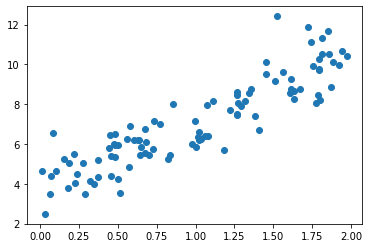

In [10]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [11]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [12]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [13]:
#X_fit[]

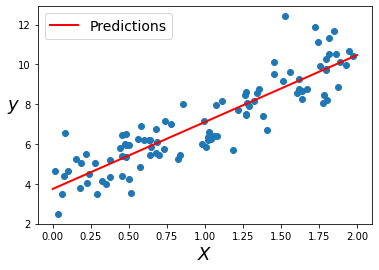

In [14]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [15]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [16]:
X_new.shape

(2, 1)

In [17]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [18]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [19]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [73]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [22]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [77]:
X_poly

array([[ 1.59307739e+00,  2.53789558e+00],
       [-2.04655099e+00,  4.18837097e+00],
       [ 6.61350897e-01,  4.37385009e-01],
       [-2.18787551e+00,  4.78679923e+00],
       [ 1.50825052e+00,  2.27481962e+00],
       [ 9.41730938e-01,  8.86857159e-01],
       [ 2.73968773e+00,  7.50588884e+00],
       [-2.58625190e+00,  6.68869890e+00],
       [-2.65767167e+00,  7.06321872e+00],
       [-1.30687755e+00,  1.70792894e+00],
       [-1.42976590e+00,  2.04423052e+00],
       [-1.51812721e+00,  2.30471021e+00],
       [ 2.43752748e+00,  5.94154023e+00],
       [-1.50272280e+00,  2.25817582e+00],
       [-1.36830164e+00,  1.87224939e+00],
       [ 1.55638957e+00,  2.42234851e+00],
       [-3.01560945e-01,  9.09390037e-02],
       [ 1.66026334e+00,  2.75647436e+00],
       [-2.60780305e+00,  6.80063677e+00],
       [-7.45728380e-02,  5.56110816e-03],
       [-2.79831840e+00,  7.83058586e+00],
       [-2.62408078e+00,  6.88579994e+00],
       [ 2.43862472e+00,  5.94689053e+00],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [78]:
print(X[0])
print(X[0]*X[0])


[1.59307739]
[2.53789558]


In [79]:
X_poly[0]

array([1.59307739, 2.53789558])

Fit the model to this extended training data:

In [80]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04786598, 0.55028945]]), array([2.02822927]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

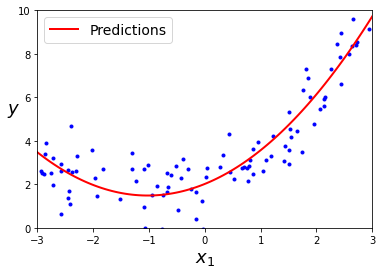

In [28]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [241]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
198,3.327666,40.293916
910,6.228207,31.981694
456,4.301252,43.972223
426,4.222174,50.877415
934,6.527013,32.371048
763,5.381309,38.106508
94,2.759568,55.564663
765,5.410813,32.929128
57,2.354877,42.135353
654,5.019707,29.927801


In [242]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [243]:
len(X)

1000

In [244]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

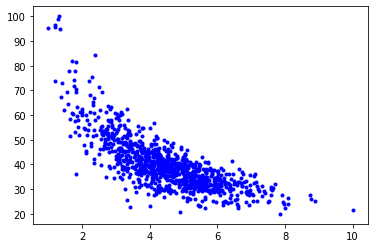

In [245]:
plt.plot(X,y,'b.')

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), 

In [247]:
#lineal
from sklearn.linear_model import LinearRegression

ModeloLR = LinearRegression(fit_intercept=True)
ModeloLR=ModeloLR.fit(X_train, y_train)

In [248]:

ModeloLR.coef_, ModeloLR.intercept_

(array([-5.91602323]), 66.44764675174278)

$\hat{y} =  -5.91X + 66.44$

su visualización

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


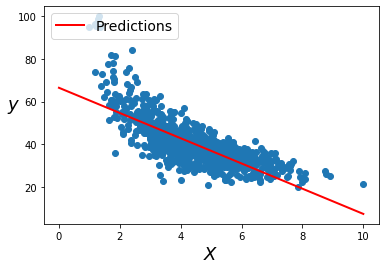

In [249]:
# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_fit = ModeloLR.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

sus errores y r cuadrada.

In [250]:
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score

y_trainMean = np.mean(y_train)



SSE = (y-y_pred)**2
SSE=sum(SSE)

SST = (y-y_trainMean)**2
SST=sum(SST)

y_predLR = ModeloLR.predict(X)

R2LR = sklearn.metrics.r2_score(y, y_predLR)

print("sum of the square of errors=", SSE)
print("sum of the total error?", SST)
print("R2 Error", R2LR)

sum of the square of errors= 48065.38233924024
sum of the total error? 112158.25663357973
R2 Error 0.5787182694747377


Regresión Múltiple Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [251]:
#polinomial

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [252]:
ModeloLR2 = LinearRegression(fit_intercept=True)
ModeloLR2.fit(X_poly, y)
ModeloLR2.coef_, ModeloLR2.intercept_

(array([-16.82425278,   1.17336718]), 89.73719677939121)

The model estimates:

$\hat{y} =  -16.82X +1.17X^2 + 89.73$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


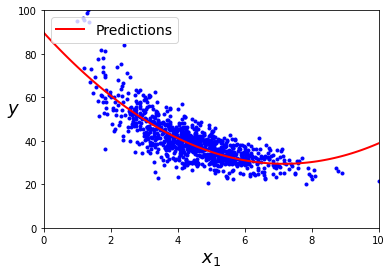

In [253]:
X_new2=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly2 = poly_features.transform(X_new2)
y_new2 = ModeloLR2.predict(X_new_poly2)
plt.plot(X, y, "b.")
plt.plot(X_new2, y_new2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0,100]);

In [254]:
y_trainMean = np.mean(y_train)



SSE = (y-y_pred)**2
SSE=sum(SSE)

SST = (y-y_trainMean)**2
SST=sum(SST)

y_predPoly = ModeloLR2.predict(X_poly)

R2Poly = sklearn.metrics.r2_score(y, y_predPoly)

print("sum of the square of errors=", SSE)
print("sum of the total error?", SST)
print("R2 Error", R2Poly)

sum of the square of errors= 48065.38233924024
sum of the total error? 112158.25663357973
R2 Error 0.6650268116056028


In [255]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.874997922220393
Root Mean Squared Error: 6.932920188437202
r2_score 0.5714133639673974


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [256]:
#Ridge
from sklearn.linear_model import  Lasso, Ridge
ModeloRidge = Ridge(alpha=1)
ModeloRidge.fit(X_train, y_train)
ModeloRidge.coef_, ModeloRidge.intercept_


(array([-5.91205682]), 66.42988442427117)

$\hat{y} =  -5.91X  + 66.42$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


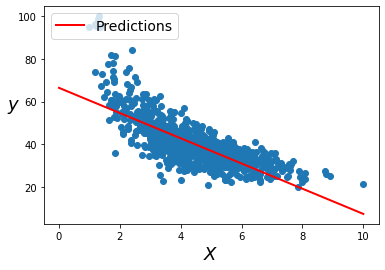

In [257]:
X_fit = np.linspace(0, 10, 100)
y_fit = ModeloRidge.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [258]:
y_trainMean = np.mean(y_train)



SSE = (y-y_pred)**2
SSE=sum(SSE)

SST = (y-y_trainMean)**2
SST=sum(SST)

y_predRidge = ModeloRidge.predict(X)

R2Ridge = sklearn.metrics.r2_score(y, y_predRidge)

print("sum of the square of errors=", SSE)
print("sum of the total error?", SST)
print("R2 Error", R2Ridge)

sum of the square of errors= 48065.38233924024
sum of the total error? 112158.25663357973
R2 Error 0.5787031880211797


In [259]:
#Lasso
ModeloLasso = Lasso(alpha=1)
ModeloLasso.fit(X_train, y_train)
ModeloLasso.coef_, ModeloLasso.intercept_


(array([-5.34575577]), 63.89388605175991)

$\hat{y} =  -5.34X  + 63.89$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


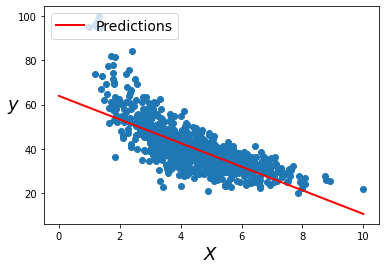

In [260]:
X_fit = np.linspace(0, 10, 100)
y_fit = ModeloLasso.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [261]:
y_trainMean = np.mean(y_train)



SSE = (y-y_pred)**2
SSE=sum(SSE)

SST = (y-y_trainMean)**2
SST=sum(SST)

y_predLasso = ModeloLasso.predict(X)

R2Lasso = sklearn.metrics.r2_score(y, y_predLasso)

print("sum of the square of errors=", SSE)
print("sum of the total error?", SST)
print("R2 Error", R2Lasso)

sum of the square of errors= 48065.38233924024
sum of the total error? 112158.25663357973
R2 Error 0.5714133639673974


In [262]:
def mi_MAE(y_real, y_pred):
  MAE_val=np.abs(y_real-y_pred)
  MAE_val=np.mean(MAE_val)
  return MAE_val

MAE_LR=mi_MAE(y,y_predLR)
MAE_Pol=mi_MAE(y,y_predPoly)
MAE_Ridge=mi_MAE(y,y_predRidge)
MAE_Lasso=mi_MAE(y,y_predLasso)

print(MAE_LR)
print(MAE_Pol)
print(MAE_Ridge)
print(MAE_Lasso)

4.906615535625057
4.538765565228896
4.906245982353377
4.874997922220393


['LR', 'Pol', 'Ridge', 'MAE_Lasso']
[4.906615535625057, 4.538765565228896, 4.906245982353377, 4.874997922220393]


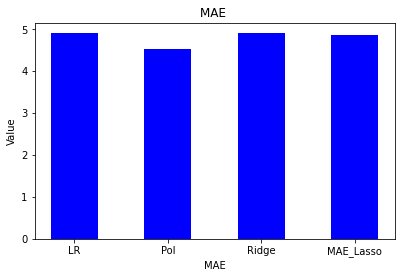

In [266]:
import matplotlib.pyplot as plt

data = {'LR':MAE_LR, 'Pol': MAE_Pol, 'Ridge': MAE_Ridge,
        'MAE_Lasso':MAE_Lasso}

print(Model)
print(values)

Model = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 3))
MaeGraph = fig.add_axes([0,0,1,1])
 
MaeGraph.bar(Model,values, color ='b', width =.5)

plt.xlabel("MAE")
plt.ylabel("Value")
plt.title("MAE ")
plt.show()

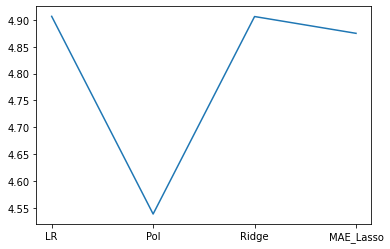

In [269]:
plt.plot(Model,values)

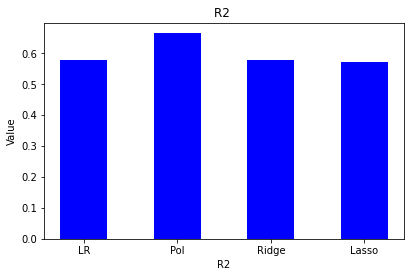

In [268]:
data2 = {'LR':R2LR, 'Pol': R2Poly, 'Ridge': R2Ridge,
        'Lasso':R2Lasso}

Model2 = list(data2.keys())
values2 = list(data2.values())

fig = plt.figure(figsize = (5, 3))
MaeGraph = fig.add_axes([0,0,1,1])
 
MaeGraph.bar(Model2,values2, color ='b', width =.5)

plt.xlabel("R2")
plt.ylabel("Value")
plt.title("R2 ")
plt.show()

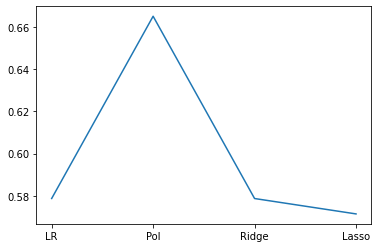

In [270]:
plt.plot(Model2,values2)

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [179]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8370,2586800210,20150421T000000,425000.0,5,2.00,2500,7804,1.5,0,0,...,7,1570,930,1921,0,98146,47.5031,-122.348,1170,7676
5640,9521100280,20140612T000000,480000.0,3,2.50,1250,1103,3.0,0,2,...,8,1250,0,2005,0,98103,47.6619,-122.352,1250,1188
3456,3575302345,20141208T000000,508500.0,4,2.75,2520,12500,2.0,0,0,...,8,1720,800,1979,0,98074,47.6225,-122.064,2520,13000
4967,8678500020,20141213T000000,1575000.0,4,3.50,5830,131116,2.0,0,0,...,11,5830,0,2005,0,98024,47.5986,-121.949,5340,207206
3789,5706201140,20141121T000000,533250.0,4,1.75,1520,15398,1.0,0,0,...,7,1370,150,1960,0,98027,47.5265,-122.050,1840,12500
20309,7768800280,20140722T000000,870515.0,4,3.50,3600,5697,2.0,0,0,...,9,2940,660,2014,0,98075,47.5755,-122.071,3490,5911
16517,3211200290,20140527T000000,304000.0,3,1.00,900,7500,1.0,0,0,...,7,900,0,1972,0,98034,47.7314,-122.237,1960,7500
7739,7519000665,20150408T000000,565000.0,5,1.50,1940,3430,1.5,0,0,...,6,1220,720,1926,0,98117,47.6853,-122.362,1830,4120
12724,13001215,20150305T000000,130000.0,3,1.00,1100,5100,1.0,0,0,...,7,1100,0,1913,0,98108,47.5231,-122.332,1450,5100
3162,9169600096,20140801T000000,720000.0,2,1.50,1840,9000,1.0,0,2,...,8,1340,500,1957,0,98136,47.5281,-122.388,1880,7560


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [181]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [182]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


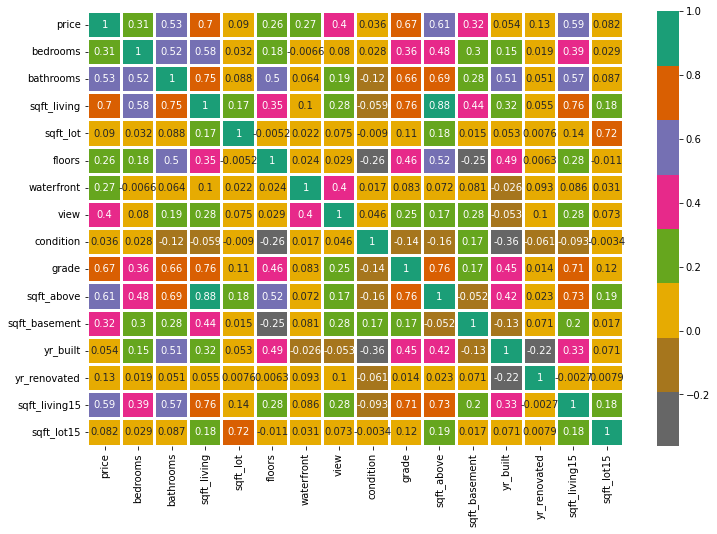

In [183]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [184]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
#tu codigo aquí